### Cumulative Flow Diagram Example

Imagine you have captured the following data from your work:

In [1]:
from wwibd import metrics

activities = ['Build', 'Verify']
timestamps = {'a': [1, 2, 3, 5, 7], 'b': [2.5, 5.7, 6.5, 8.8, 9.1]}
cycle_times_df = metrics.cycle_times(activities, timestamps)

cycle_times_df


,Arrival,Build_started,Build_completed,Verify_started,Verify_completed,Started,Completed,Cycle_time
a,1.0,2.0,3.0,5.0,7.0,2.0,7.0,5.0
b,2.5,5.7,6.5,8.8,9.1,5.7,9.1,3.4


Then we can translate that to the following event stream:

In [2]:
event_stream = metrics.get_event_stream(cycle_times_df)
event_stream

a  Build_started       2.0
   Build_completed     3.0
   Verify_started      5.0
b  Build_started       5.7
   Build_completed     6.5
a  Verify_completed    7.0
b  Verify_started      8.8
   Verify_completed    9.1
dtype: float64

And we can turn that into the following CFD:

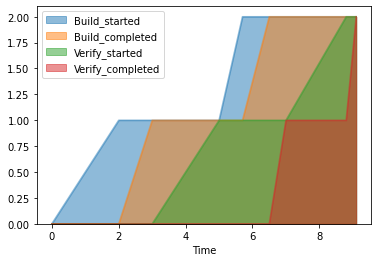

In [3]:
cfd_plot = metrics.cfd_plot(cycle_times_df)

### Sample simulation

Let's run the simulation from example 2 and plot some results.

In [4]:
from example_02_constrained_capabilities import run, output_cycle_time_file_name

run(until=42)

Hello world!
Simulation done.


Import the cycle time data and take a look at some plots.

In [5]:
import pandas as pd

df = pd.read_csv(output_cycle_time_file_name)
df

,Arrival,specify_started,specify_completed,build_started,build_completed,verify_started,verify_completed,Started,Completed,Cycle_time
0,0.000000,0.000000,4.237169,4.237169,6.484624,7.682307,9.846142,0.000000,9.846142,9.846142
1,0.671821,0.671821,1.947166,1.947166,4.424342,4.424342,7.682307,0.671821,7.682307,7.010485
2,4.490694,4.490694,4.959992,4.959992,5.101730,5.101730,9.280555,4.490694,9.280555,4.789861
3,8.434311,8.434311,8.444841,8.444841,10.671777,10.671777,14.279477,8.434311,14.279477,5.845166
4,12.245711,12.245711,16.972065,16.972065,21.667811,21.667811,22.761716,12.245711,22.761716,10.516004
5,13.389523,13.389523,13.542473,13.542473,13.669702,13.669702,16.376764,13.389523,16.376764,2.987242
6,17.896660,17.896660,18.979657,18.979657,21.090240,21.090240,22.255662,17.896660,22.255662,4.359002
7,19.802681,19.802681,20.911139,21.090240,22.244572,22.255662,22.363111,19.802681,22.363111,2.560429
8,19.947885,19.947885,22.426946,22.426946,26.614836,26.614836,27.219286,19.947885,27.219286,7.271401
9,22.137323,22.137323,23.586231,23.586231,26.368503,26.368503,31.331220,22.137323,31.331220,9.193897


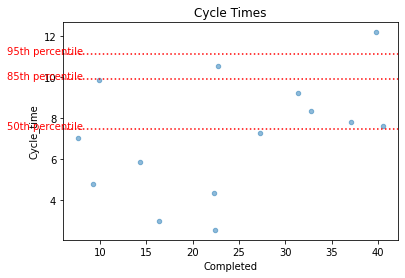

In [6]:
metrics.cycle_time_scatter_plot(df);

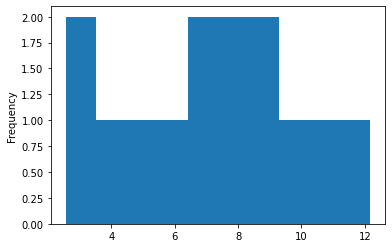

In [7]:
metrics.cycle_time_histogram_plot(df);

Let's inspect the event stream for this simulation:

In [8]:
metrics.get_event_stream(df)

0   specify_started       0.000000
1   specify_started       0.671821
    build_started         1.947166
    specify_completed     1.947166
0   specify_completed     4.237169
                           ...    
11  verify_completed     39.816808
16  specify_started      39.957894
13  verify_completed     40.500437
14  build_completed      41.234356
    verify_started       41.234356
Length: 91, dtype: float64

<AxesSubplot:xlabel='Time'>

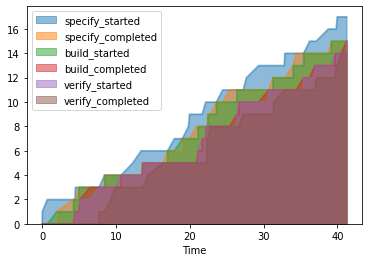

In [9]:
metrics.cfd_plot(df)